<a href="https://colab.research.google.com/github/dnhirapara/049_DarshikHirapara/blob/main/lab8/Lab_08_EX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.cluster import KMeans

In [ ]:
# Load dataset
dataset=datasets.load_breast_cancer()
dataset.data.shape

(569, 30)

In [ ]:
# Create & train model
kmeans = KMeans(n_clusters=10, random_state=49)
prediction = kmeans.fit_predict(dataset.data)
prediction

array([9, 9, 1, 0, 1, 8, 1, 8, 8, 8, 5, 4, 4, 5, 8, 5, 5, 4, 6, 8, 0, 2,
       5, 6, 9, 4, 8, 4, 4, 4, 1, 8, 4, 9, 4, 4, 8, 0, 8, 8, 8, 0, 1, 8,
       8, 1, 2, 8, 0, 8, 0, 8, 0, 4, 5, 0, 9, 5, 0, 2, 2, 2, 5, 2, 8, 5,
       2, 0, 2, 0, 9, 2, 1, 8, 0, 4, 0, 1, 1, 0, 0, 0, 3, 4, 0, 1, 8, 1,
       0, 8, 8, 8, 8, 8, 5, 9, 0, 2, 0, 8, 8, 2, 0, 2, 2, 8, 0, 0, 6, 0,
       2, 0, 8, 2, 2, 0, 2, 5, 4, 4, 0, 1, 6, 8, 0, 8, 8, 1, 8, 1, 0, 5,
       4, 5, 1, 0, 0, 0, 5, 2, 2, 4, 0, 0, 2, 0, 0, 8, 8, 8, 0, 2, 2, 2,
       8, 0, 4, 5, 0, 0, 0, 1, 6, 0, 6, 8, 2, 4, 1, 8, 0, 5, 5, 2, 2, 2,
       2, 5, 0, 0, 3, 9, 4, 0, 5, 2, 4, 0, 0, 0, 8, 0, 2, 8, 8, 0, 8, 4,
       1, 5, 0, 4, 6, 5, 0, 5, 2, 4, 0, 5, 1, 0, 3, 5, 8, 8, 0, 2, 9, 6,
       8, 8, 2, 5, 8, 8, 2, 8, 0, 8, 4, 0, 0, 9, 2, 8, 3, 9, 8, 4, 8, 0,
       0, 8, 1, 2, 0, 0, 2, 0, 9, 0, 9, 4, 9, 8, 9, 5, 4, 5, 9, 4, 4, 5,
       4, 3, 2, 8, 0, 2, 8, 0, 6, 2, 4, 0, 0, 4, 8, 8, 1, 0, 1, 5, 0, 0,
       0, 0, 2, 0, 8, 8, 0, 0, 0, 8, 2, 0, 8, 2, 9,

In [ ]:
print(len(prediction))
kmeans.cluster_centers_.shape

569


(10, 30)

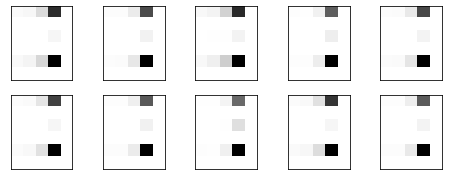

In [ ]:
# Scatter plot of the data points
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
import numpy as np
from scipy.stats import mode

labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(dataset.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(dataset.target, labels)

0.9086115992970123

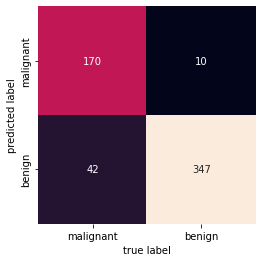

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(dataset.target, labels)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=dataset.target_names,yticklabels=dataset.target_names)

#ax.set_ylim(10,10)
plt.xlabel('true label')
plt.ylabel('predicted label');